# Social Graphs Final Project

For this project, our goal is to take the top 150 most popular movies of all times on IMDB, and analyse the connection between the main actors starring in them. We want to get an insight into the dynamics of relationships and collaborations among actors in the film industry. For example, we might discover key actors who have repeatedly worked together, which would indicate successful collaborations.

## Creating the network

WE NEED THE CODE FOR MOVIES CAST NEW FILE HERE

ALSO NEED TO EXPLAIN THIS FOLLOWING CODE A BIT MORE WITH COMMENTS

In [1]:
import networkx as nx
import pickle
import re 
import matplotlib.pyplot as plt

In [11]:

def remove_number_dot_space(s):
    re.sub(r'^\d+\.\s*', '', s)

# to get the first x amount of items from the dictionary
def get_first_N_item(d, n):
    items = list(d.items())[:n]
    return dict(items)

# open the dictionary with the cast for each movie
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)
    
# only take the top 150 movies cast
new_data = get_first_N_item(data, 150)

# save the 150 movie titles
movie_titles = list(new_data.keys())

# create an empty graph
G = nx.Graph()
temp_names = new_data.values()
all_names = []

# we take the top cast from each movie, the first 10 actors
top_cast_nr = 10

for i in temp_names:
    if len(i) > top_cast_nr:
        i = i[:top_cast_nr]
    all_names += i

# remove repeated actors
unique_items = set(all_names)

# add unique actors as nodes to the graph
unique_list = list(unique_items)
G.add_nodes_from(unique_list)

data = new_data

actor_dict = {}
keys = data.keys()

for actor in list(G.nodes()):
    movies_list = [movie for movie, actors_list in data.items() if actor in actors_list]
    actor_dict[actor] = movies_list


print(actor_dict)


nx.set_node_attributes(G, actor_dict, 'movies starred in')

print(actor_dict)
for names in new_data.values():
    if len(names) > top_cast_nr:
        names = names[:top_cast_nr]
    
    for i in range(len(names)):
        for j in range(len(names)):
            if names[i] != names[j]:
                G.add_edge(names[i], names[j])
                
            


{'Chester Conklin': ['Modern Times', 'The Great Dictator'], 'Ben Miles': ['V for Vendetta'], 'Victor Alexander': ['City Lights'], 'Noel Appleby': ['The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Fellowship of the Ring'], 'Stockton Taylor': ['There Will Be Blood'], 'James Cromwell': ['The Green Mile', 'L.A. Confidential'], 'Scott Bakula': ['American Beauty'], 'Paul Shenar': ['Scarface'], 'Martin Landau': ['North by Northwest'], 'Harriet Sansom Harris': ['Memento'], 'Eli Wallach': ['The Good, the Bad and the Ugly'], 'Carrie Fisher': ['Star Wars: Episode V - The Empire Strikes Back', 'Star Wars: Episode IV - A New Hope', 'Star Wars: Episode VI - Return of the Jedi'], 'Hugo Weaving': ['The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Fellowship of the Ring', 'The Lord of the Rings: The Two Towers', 'The Matrix', 'V for Vendetta'], 'Stephen Tobolowsky': ['Memento'], 'Josh Pais': ['Joker', 'A Beautiful Mind'], 'Frédéric Paquet': ['Incen

## Analysis of the network

from assignment 2, some things we could answer:

_Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

> * What is the number of nodes in the network? 
> * What is the number of links?
> * Who is the top connected actor? Comment on your findings. Is this what you would have expected?


In [16]:
print("There are {} number of nodes in the network".format(G.number_of_nodes()))
print("There are {} number of links in the network".format(G.number_of_edges()))

There are 1287 number of nodes in the network
There are 6563 number of links in the network


In [29]:
# get the degrees of each node
degrees = dict(G.degree())

# all_degrees = [degrees[i] for i in G.nodes()]

# Sort degrees in descending order
sorted_degrees = sorted(degrees.items(), key=lambda item: item[1], reverse=True)

# Get the top 5 nodes
top_nodes = dict(sorted_degrees[:5])

# Print the names of the top 5 actors
print("Top 5 Actors:")
for actor_name, degree in top_nodes.items():
    print(f"{actor_name}: {degree} degrees")

Top 5 Actors:
Robert De Niro: 51 degrees
Morgan Freeman: 42 degrees
Harrison Ford: 39 degrees
Tom Hanks: 39 degrees
Leonardo DiCaprio: 36 degrees


> * Plot the degree distribution for the whole network. 
>   * Use axes that make sense for visualizing this particular distribution.
>   * What do you observe? 
>   * Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?
> * Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?
> * Compare the two degree distributions to the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results.


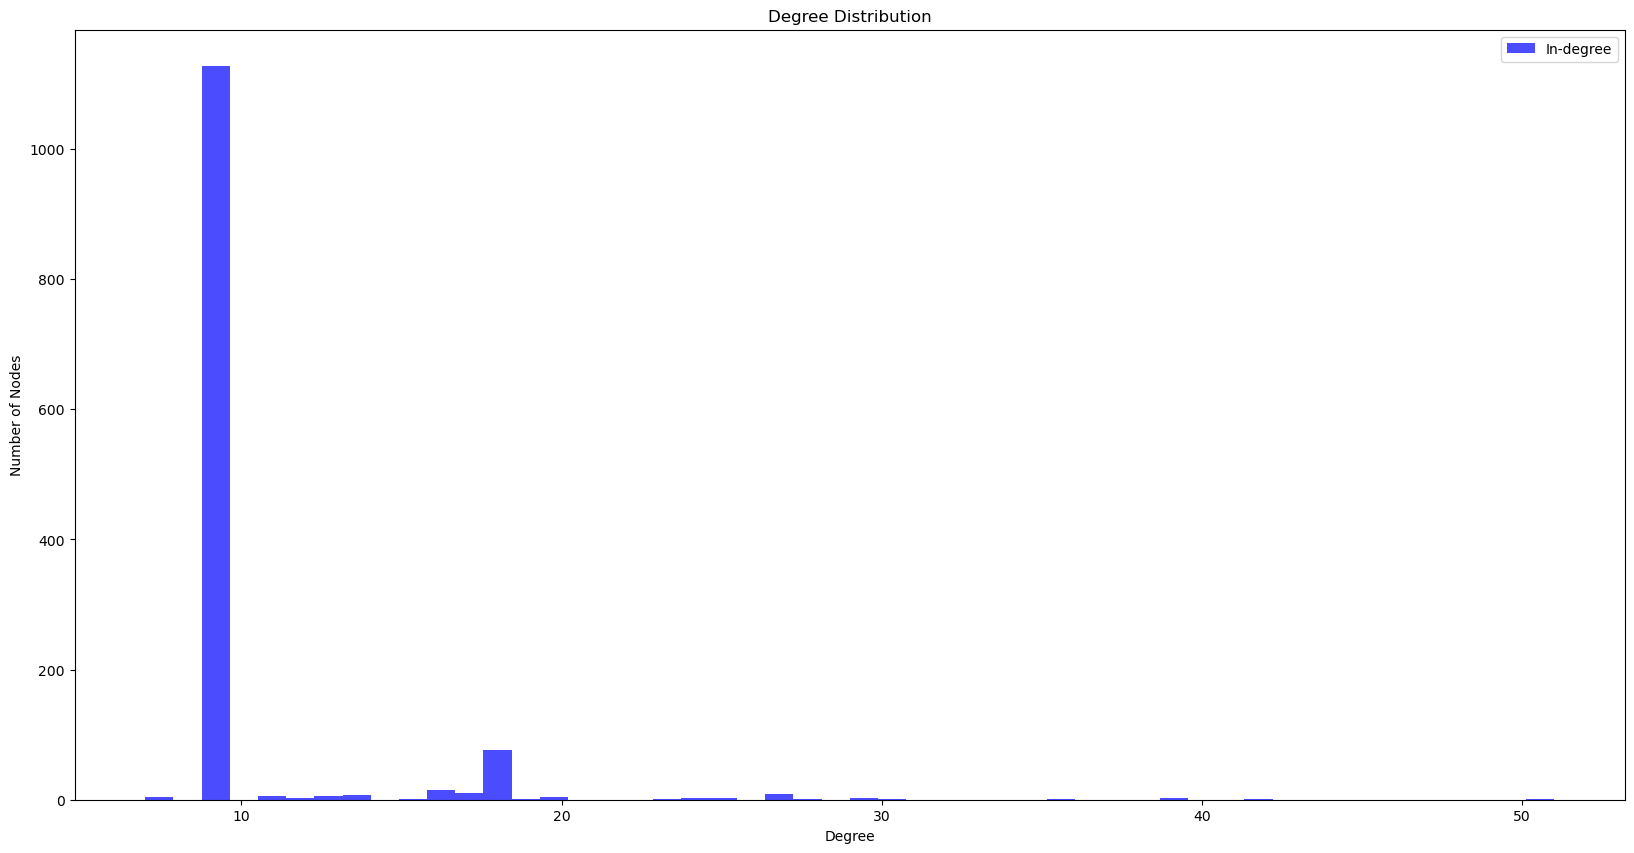

In [45]:
# make a list of the degrees
degrees_list = []
for node in G.nodes():
    degrees_list.append(degrees[node])

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot in-degree distribution
plt.hist(degrees_list, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.legend()
plt.show()


_Exercise 1b_: Visualization (see lecture 5 for more hints)

> * Create a nice visualization of the total network:
>   * Color nodes according to the role;
>   * Scale node-size according to degree;
>   * Get node positions based on either the Force Atlas 2 algorithm, or the built-in algorithms for networkX;
>   * Whatever else you feel like that would make the visualization nicer.
> * Describe the structure you observe. What useful information can you decipher from this?

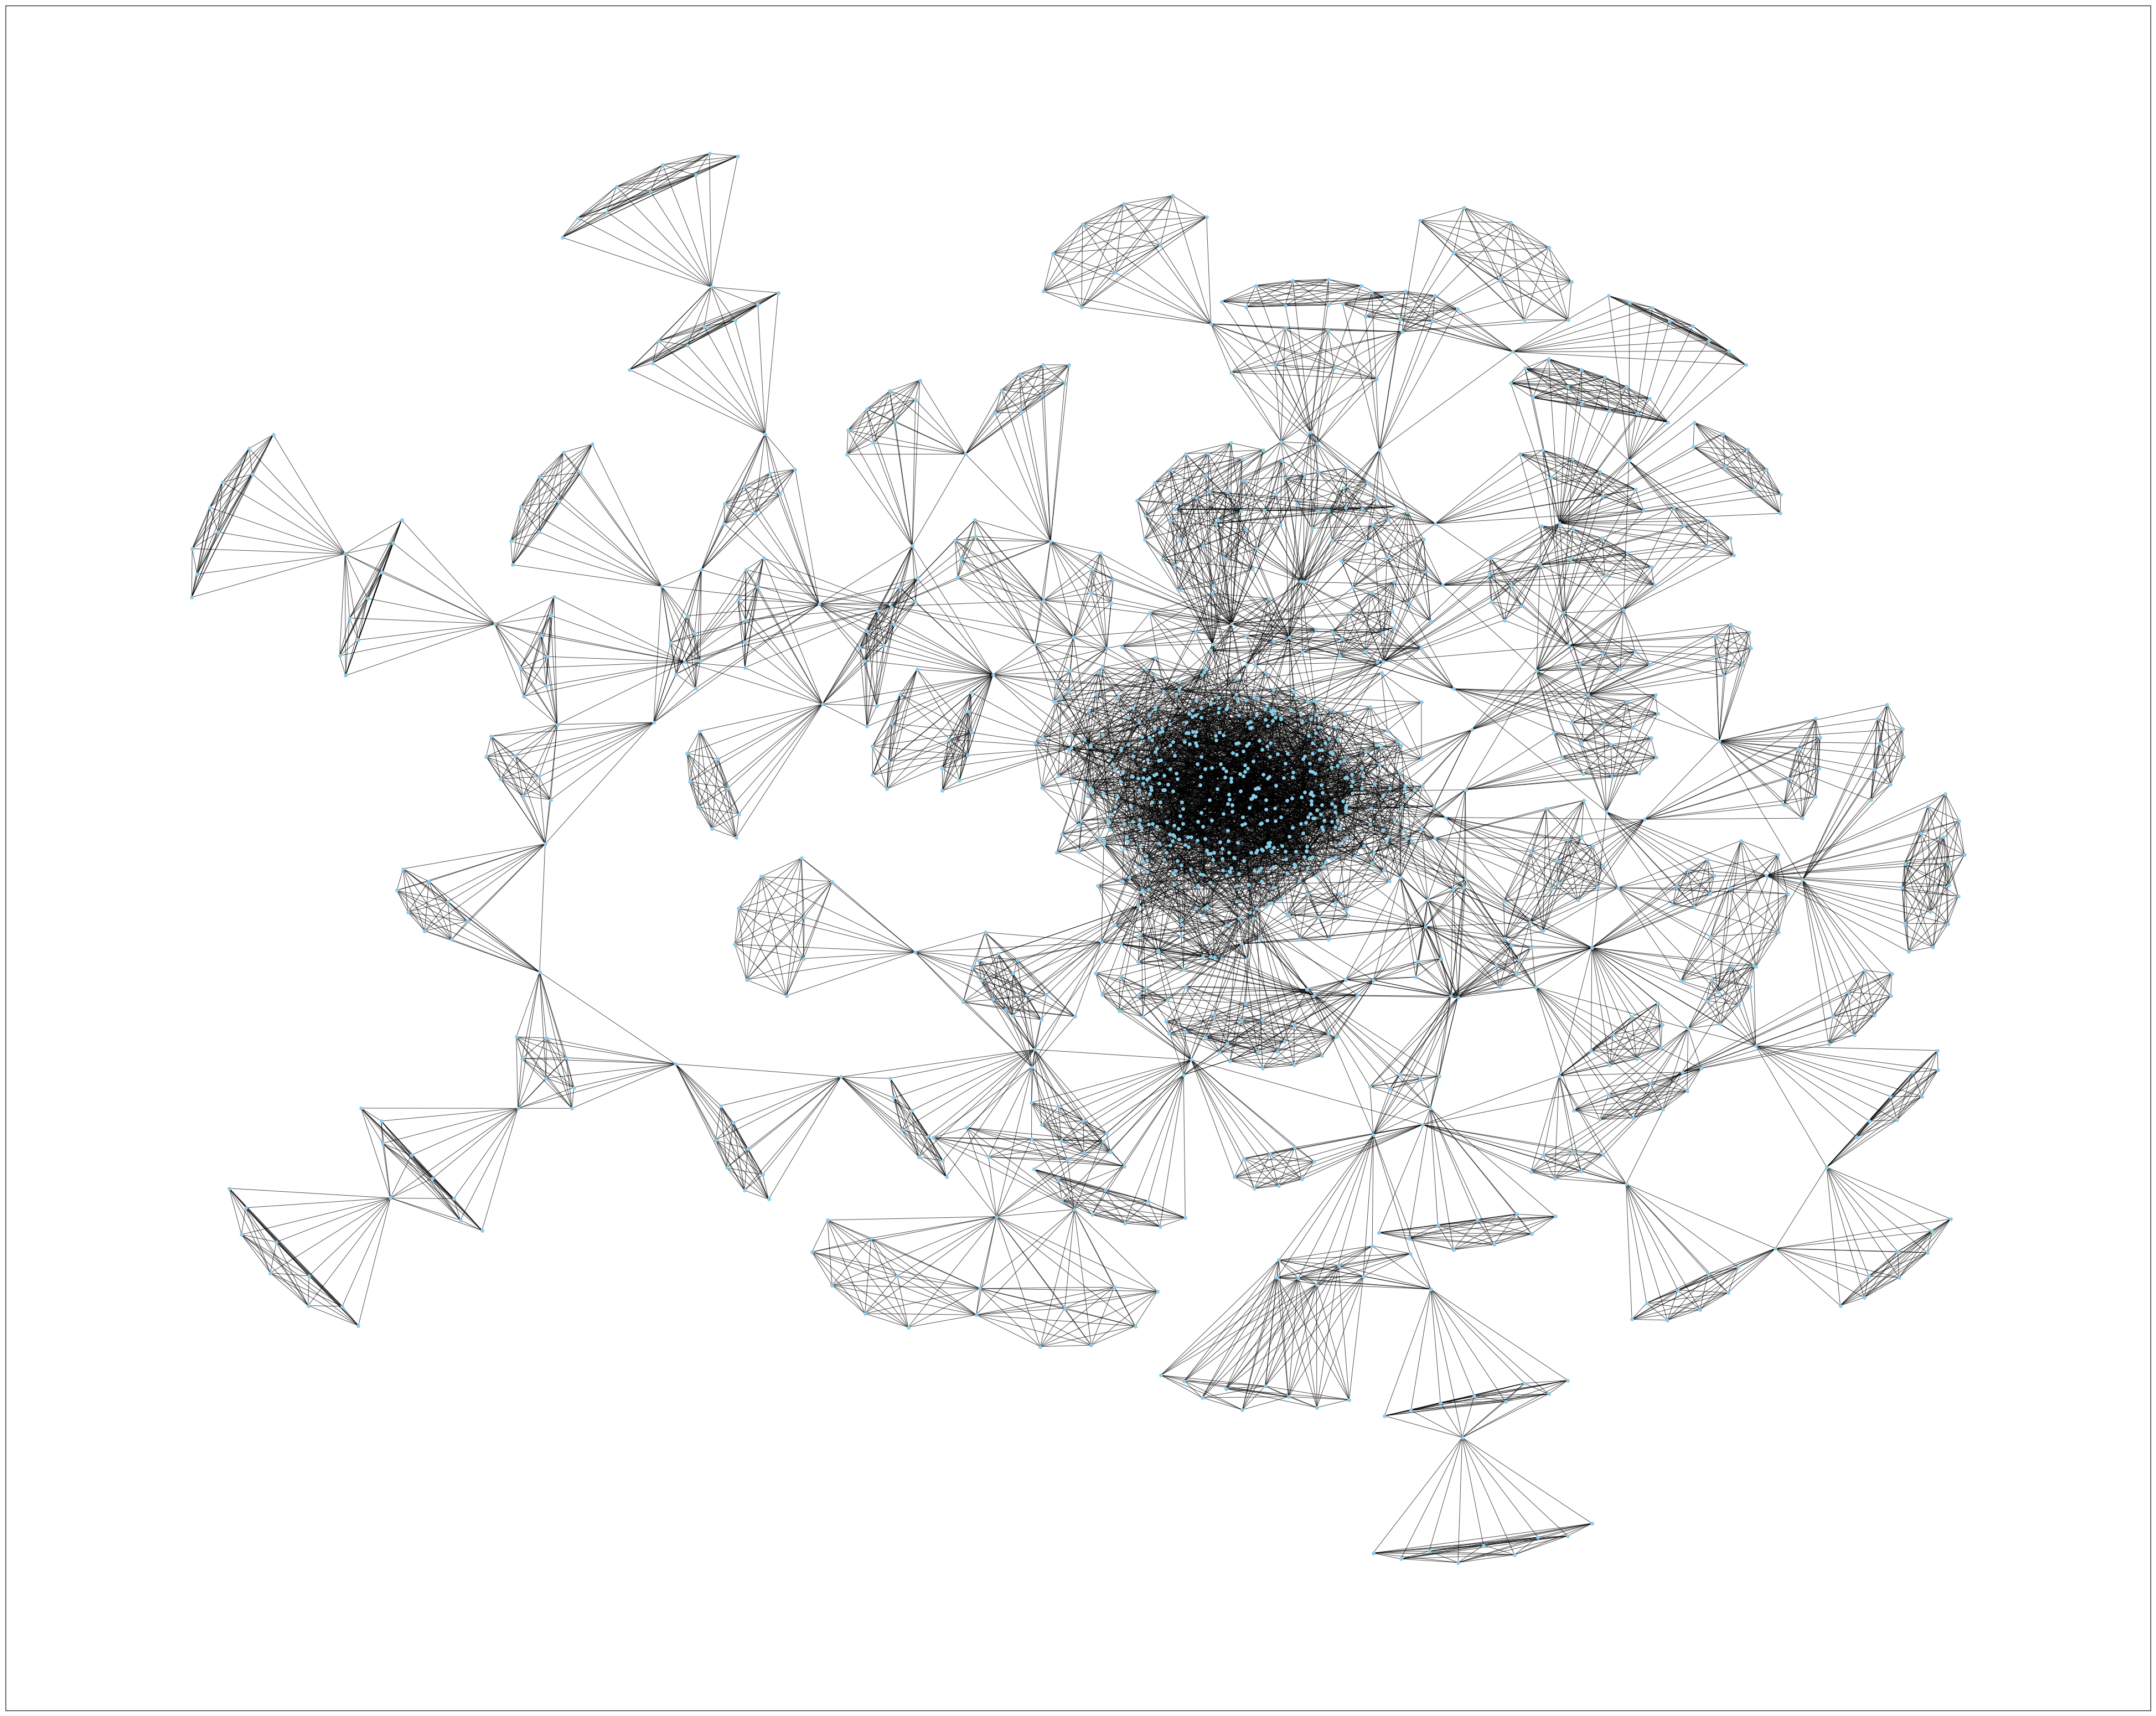

In [30]:
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, pos, node_size = all_degrees)

# Get positions for all nodes
pos = nx.kamada_kawai_layout(G)

# Set the figure size
plt.figure(figsize=(50, 40))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=0.7, alpha=0.7)

plt.show()

## Text and sentiment analysis

justify why we take the wikipedia plot instead of imdb: imdb was shorteR?
basically explain everything in detail why we do it and explain model we use etc

In [49]:
import wikipedia
import pickle

In [54]:
def extract_plot_section(movie_title):
    try:
        # Check if the movie is "Hamilton"
        if movie_title.lower() == "hamilton":
            # For "Hamilton," look for the "== Synopsis ==" section
            plot_marker = "== Synopsis =="
        else:
            # For other movies, look for the "== Plot ==" section
            plot_marker = "== Plot =="
        
        a = wikipedia.search(movie_title + ' film')

        # get the wiki page for the movie
        wiki = wikipedia.page(a[0], auto_suggest = False)

        # find where the "Plot" section starts
        start = wiki.content.find(plot_marker)
        #print(start)
    
        # Check if the "Plot" section was found
        if start != -1:
            # Find where the next " == break line" occurs to mark the end of the Plot
            end = wiki.content.find(" ==\n", start + len(plot_marker))

            # Check if the closing "==" was found
            if end != -1:
                # Return the "Plot" section
                plot_section = wiki.content[start + len(plot_marker):end].strip()
                return plot_section
            else:
                return "Closing '==' not found for the 'Plot' section."
        else:
            return "Plot section not found for this movie."

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e}"
    except wikipedia.exceptions.HTTPTimeoutError:
        return "HTTP timeout error. Please try again later."
    except wikipedia.exceptions.PageError:
        return f"Page not found for {movie_title}."

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e}"
    except wikipedia.exceptions.HTTPTimeoutError:
        return "HTTP timeout error. Please try again later."
    except wikipedia.exceptions.PageError:
        return f"Page not found for {movie_title}."
    except Exception as e:
        return f"An error occurred: {str(e)}"

In [55]:
# this is an example to use the function
movie_title = "Hamilton"
plot_summary = extract_plot_section(movie_title)
print(plot_summary)

Hamilton narrates Alexander Hamilton's life in two acts, and details among other things his involvement in the American Revolutionary War as an aide-de-camp to George Washington, his marriage to Elizabeth Schuyler Hamilton, his career as a lawyer and secretary of the treasury, and his interactions with Aaron Burr which culminates in their duel at the end of Hamilton's life.


=== Act I ===
The orphan Alexander Hamilton experiences a hard early life, and through his smarts and the charitability of the townsfolks leaves his home, the island of Nevis ("Alexander Hamilton"). As a student at King's College in New York in 1776, Hamilton meets Aaron Burr, John Laurens, the Marquis de Lafayette, and Hercules Mulligan ("Aaron Burr, Sir"), and impresses them with his rhetorical skills ("My Shot"). The latter three and Hamilton affirm their revolutionary goals to each other, while Burr remains apprehensive ("The Story of Tonight"). Later, the daughters of the wealthy Philip Schuyler—Peggy, Angeli

In [7]:
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)

In [8]:
print(data)

{'The Shawshank Redemption': ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 'Clancy Brown', 'Gil Bellows', 'Mark Rolston', 'James Whitmore', 'Jeffrey DeMunn', 'Larry Brandenburg', 'Neil Giuntoli', 'Brian Libby', 'David Proval', 'Joseph Ragno', 'Jude Ciccolella', 'Paul McCrane', 'Renee Blaine', 'Scott Mann', 'John Horton', 'Gordon Greene', 'Alfonso Freeman', 'Vincent Foster', 'John E. Summers', 'Frank Medrano', 'Mack Miles', 'Alan R. Kessler', 'Morgan Lund', 'Cornell Wallace', 'Gary Lee Davis', 'Neil Summers', 'Ned Bellamy', 'Joe Pecoraro', 'Harold E. Cope Jr.', 'Brian Delate', 'Don McManus', 'Donald Zinn', 'Dorothy Silver', 'Robert Haley', 'Dana Snyder', 'John D. Craig', 'Ken Magee', 'Eugene C. DePasquale', 'Bill Bolender', 'Ron Newell', 'John R. Woodward', 'Chuck Brauchler', 'Dion Anderson', 'Claire Slemmer', 'James Kisicki', 'Rohn Thomas', 'Charlie Kearns', 'Rob Reider', 'Brian Brophy', 'Paul Kennedy', 'James Babson', 'Dennis Baker', 'Fred Culbertson', 'Richard Doo

In [9]:
# new dictionary to store movie titles and their plot sections
movie_plots = {}

# Iterate through the movie titles in the original dictionary
for movie_title in data:
    # extract the plot section for each movie
    plot_summary = extract_plot_section(movie_title)
    
    # add the movie title and plot summary to the new dictionary
    movie_plots[movie_title] = plot_summary

/usr/local/anaconda3/lib/python3.11/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/anaconda3/lib/python3.11/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [10]:
print(movie_plots)

{'The Shawshank Redemption': 'In early 1947, Portland, Maine, banker Andy Dufresne arrives at Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover. He is befriended by Ellis "Red" Redding, a contraband smuggler serving a life sentence, who procures a rock hammer and a large poster of Rita Hayworth for Andy. Assigned to work in the prison laundry, Andy is frequently sexually assaulted by prison gang "the Sisters" and their leader, Bogs Diamond.\nIn 1949, Andy overhears the captain of the guards, Byron Hadley, complaining about being taxed on an inheritance and offers to help him shelter the money legally. After an assault by the Sisters nearly kills Andy, Hadley beats and cripples Bogs, who is subsequently transferred to another prison; Andy is not attacked again. Warden Samuel Norton meets Andy and reassigns him to the prison library to assist elderly inmate Brooks Hatlen, a front to use Andy\'s financial expertise to manage financial matt

In [11]:
# save the movie_plots dictionary to a new file (e.g., "movie_plots.pkl")
with open("movie_plots.pkl", "wb") as fp:
    pickle.dump(movie_plots, fp)